# Data Prep Notebook

### Background 

The following notebook analyses, cleans and prepares data imported from the Thera Bank Loans dataset in preparation for input into machine learning models.  Tasks performed on the data: 
1. Data Clean 
2. Exploratory Data Analysis 
3. Data Preparation and Feature Selection
•	Data Split
•	Scaling
•	Apply Over Sampling.
4. Data Export

### Objective 
The objective is to generate prepared datasets to import into machine learning models.  Following files will be generated and exported to the resource folder for upload. 

-	Bank_Personal_Loan_Modelling.xlsx - inital data file
-	features.csv – features dataset
-	X_test_scaled.csv
-	X_train_scaled.csv
-	X_train_ros.csv – random oversampled applied dataset
-	y_train_ros.csv
-	X_train_smote.csv – SMOTE oversampled applied dataset
-	y_train_smote.csv
-	y_test.csv
-	y_train.csv


In [10]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_datareader.data as web
import csv
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Notebook Functions

### Data import and analysis

Dataset contains 12 features described below below.  Target variable will be Personal Load  

Binary Category Features:   
Personal Loan:      Did this customer accept the personal loan offered in the last campaign? 1 yes, 0 no   
Securities Account: Does the customer have a securities account with the bank? 0 yes, 1 no   
CD Account:         Does the customer have a certificate of deposit (CD) account with the bank? 0 yes, 1 no    
Online:             Does the customer use internet banking facilities? 0 yes, 1 no   
CreditCard:         Does the customer uses a credit card issued by UniversalBank? 0 yes, 1 no   

Interval Features:   
Age: Customer's age.  
Experience: Number of years of professional experience     
Income: Annual income of the customer                  
CCAvg: Avg. spending on credit cards per month              
Mortgage: Value of house mortgage if any.        

Ordinal Categorical Features:   
Family: Family size of the customer  
Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional   

Nominal Features:
ID: Customer ID   
ZIPCode: Home Address ZIP code      

   

In [2]:
# Setup input and output files and locations
filepath = "resources/"
file_csv = Path(filepath + "Bank_Personal_Loan_Modelling.csv")

# Read the data into a dataframe
loan_df = pd.read_csv(file_csv)
file_csv
loan_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Data Clean

#### Execution:
1. Determine number of null and clean values if any.   
2. Determine number of duplicate rows and clean values if any.
3. Describe data, check for irregularities.

#### Observations
Overall, the dataset is very clean with no null or Na values.  Also, there are no duplicate rows.  After describing the data there are negative values found in the Experience column but these values will be addressed after the Exploratory Analysis


In [3]:
# Identify column counts identifying the number of rows
loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
# Determine number of nulls
# Cleanse nulls from DataFrame by filling na if any
# Cleaning nulls from DataFrame by dropping
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# Check duplicates and clean duplicates
loan_df.duplicated().sum()

0

In [6]:
# Describe final data
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
# Investigate negative value in experience column.  Will be dealt with later
loan_df[loan_df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


### Exploratory Data Analysis
#### Execution:
1. Analyze data distributions   
2. Check feature correlations
3. Analyze target and binary features

#### Observations
From the data distribution, Age and Experience appear to be normal distributed.  Data for Mortgage and Income are skewed to the left.  ID feature proves to have no value and the mean of ZIP code is in the 9000 range which would indicate majority of customer are in California.  Again, this data would appear to have no meaning to the analysis. Age and Experience features are highly correlated at .99.  Also, income and CCAvg highly correlated at .65.  After analyzing the target feature, there is an imbalance in the data where 9% of customer purchase a loan during the last sales campaign.   Other observations:
1.	89 % of the customers own a securities account with the bank
2.	94 % of customers own a deposit account with the bank
3.	60 % do not use online services
4.	70 % of customers have a Credit Card with the bank.



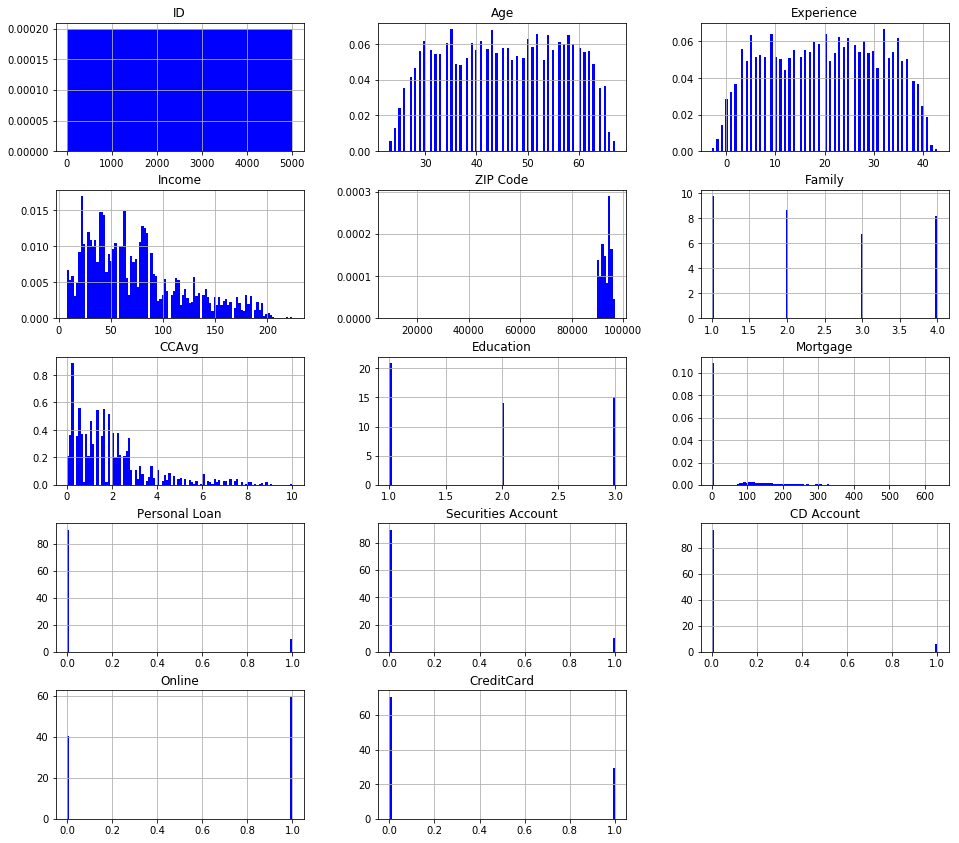

In [8]:
# Evaluate and compare attribute distributions. 
columns=loan_df.columns
loan_df[columns].hist(stacked=True,density=True, bins=100,color='blue', figsize=(16,30), layout=(10,3)); 


In [9]:
# Calculate the correlation between each column
# Use the `heatmap` function from the Seaborn library to visualize correlations
plt.figure(figsize=(12,10))
sns.heatmap(loan_df.corr(),annot=True)


NameError: name 'sns' is not defined

<Figure size 864x720 with 0 Axes>

In [184]:
# Analysis of Binary features
binary_df = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

# Create dataframe for binary feature counts
counts = pd.DataFrame(binary_df)

for col in binary_df:
    counts = pd.concat([counts,loan_df[col].value_counts()], axis=1, join='inner')

counts = counts.drop(columns = [0])
counts

,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,4520,4478,4698,2016,3530
1,480,522,302,2984,1470


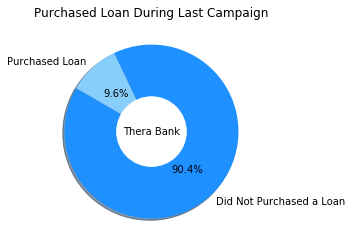

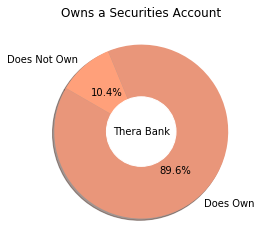

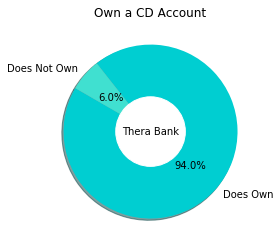

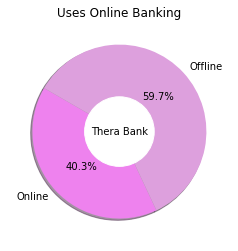

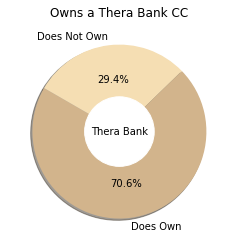

In [326]:
#Generate and display pie graph of binary features

# Label Dataframe prep for pie graphs
label = pd.DataFrame({'Personal Loan':['Did Not Purchased a Loan', 'Purchased Loan'],
                      'Securities Account': ['Does Own', 'Does Not Own'],
                      'CD Account': ['Does Own', 'Does Not Own'],
                      'Online' : ['Online', 'Offline'],
                      'CreditCard' : ['Does Own', 'Does Not Own'] })

# Color Dataframe prep for pie graphs
color = pd.DataFrame({'Personal Loan':['dodgerblue', 'lightskyblue'],
                      'Securities Account': ['darksalmon', 'lightsalmon'],
                      'CD Account': ['darkturquoise', 'turquoise'],
                      'Online' : ['violet', 'plum'],
                      'CreditCard' : ['tan', 'wheat'] })

# Title Dataframe prep for pie graphs
title = pd.DataFrame({'Personal Loan':['Purchased Loan During Last Campaign'],
                      'Securities Account': ['Owns a Securities Account'],
                      'CD Account': ['Own a CD Account'],
                      'Online' : ['Uses Online Banking'],
                      'CreditCard' : ['Owns a Thera Bank CC'] })

# Generate pie charts for binary features
for col in counts:
    plt.figure(1)
    count_slices = [counts[col][0], counts[col][1]]
    labels = [label[col][0], label[col][1]]
    explode = (0.2, 0)
    colors = [color[col][0],color[col][1]]
    plt.pie(count_slices, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=150)
    circle=plt.Circle( (0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(circle)
    plt.text(0., 0., 'Thera Bank', horizontalalignment='center', verticalalignment='center')
    plt.title(title[col][0])
    plt.show()
  

### Data Preparation and Feature Selection

Base on the results from the exploratory analysis, the following features will be dropped.  
1.	Experience due the number of negative values and strong correlation with age.
2.	ZIP and ID dropped due to their lack of value to the analysis

To address the target feature imbalance, two oversampling methods will be employed, SMOTE and Random Oversampling techniques.

With the various different data distributions and binary features, a Standard Scaling will be applied.

Data train and test split with be the default 80 : 20


In [12]:
# Following features will be dropped
# ZIP Code, Experience and ID

loan_clean_df = loan_df.drop(columns =['Experience', 'ID', 'ZIP Code']) 

loan_clean_df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [13]:
# Create features
X = loan_clean_df.copy()
X.drop("Personal Loan",axis=1, inplace=True)

# Create featurse df for export
features = pd.DataFrame(columns=[X.columns])

# Create target
y = loan_clean_df["Personal Loan"]

X.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,1,0,0,0
1,45,34,3,1.5,1,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,1


### Split the Data into Training and Testing

In [14]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)


### Apply Standard Scaling

In [15]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Data Imbalance

In the dataset set we have identified that the target varriable is is imbalanced.  To address the imbalance we will investigate two oversample technigues using Naive Random Oversampling algorithm and the SMOTE algorithm

Note: We will use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [16]:
# Naive Random Oversampling
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)
Counter(y_train_ros)

Counter({0: 3390, 1: 3390})

In [17]:
# SMOTE Oversampling
# Resample the training data with SMOTE
X_train_smote, y_train_smote = SMOTE(random_state=1, sampling_strategy=1.0).fit_resample(
    X_train_scaled, y_train)
Counter(y_train_smote)

Counter({0: 3390, 1: 3390})

### Data Export

In [18]:
# Export X y train SMOTE applied data
# Create dataframes
X_train_smote_df = pd.DataFrame(X_train_smote)
y_train_smote_df = pd.DataFrame(y_train_smote)

# Export datasets
X_train_smote_df.to_csv(filepath + 'X_train_smote.csv', index = False, header=None)
y_train_smote_df.to_csv(filepath + 'y_train_smote.csv', index = False)

# Export X y train Randome Oversampling applied data
# Create dataframes
X_train_ros_df = pd.DataFrame(X_train_ros)
y_train_ros_df = pd.DataFrame(y_train_ros)

# Export datasets
X_train_ros_df.to_csv(filepath + 'X_train_ros.csv', index = False, header=None)
y_train_ros_df.to_csv(filepath + 'y_train_ros.csv', index = False)

# Export X y train Scaled applied data
# Create dataframes
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_test_scaled_df = pd.DataFrame(X_test_scaled)

# Export datasets
X_train_scaled_df.to_csv(filepath + 'X_train_scaled.csv', index = False, header=None)
X_test_scaled_df.to_csv(filepath + 'X_test_scaled.csv', index = False, header=None)

# Export X y train data
# Create dataframes
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Export datasets
y_train_df.to_csv(filepath + 'y_train.csv', index = True)
y_test_df.to_csv(filepath + 'y_test.csv', index = True)

# Export features data
features.to_csv(filepath+ 'features.csv')

In [5]:
# To import the X_train_smote, X_train_ros, X_train_scaled, X_test_scaled
# np.loadtxt('X_train_smote.csv', delimiter=',')
X_train_scaled = np.loadtxt(filepath + 'X_train_scaled.csv', delimiter=',')
X_test_scaled = np.loadtxt(filepath+ 'X_test_scaled.csv', delimiter=',')

# To import y_train_smote, y_train_ros
# pd.read_csv('y_train_smote.csv', sep=',', header=0, squeeze=True)

# To import y_train, y_test, features
# pd.read_csv('y_train.csv', sep=',', header=0, squeeze=True, index_col=0)
y_train = pd.read_csv(filepath +'y_train.csv', sep=',', header=0, squeeze=True, index_col=0)

# To import features
#
features = pd.read_csv(filepath + 'features.csv').drop(columns='Unnamed: 0')


In [6]:
# model = LogisticRegression(solver='lbfgs', random_state=1)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# confusion_matrix(y_test, y_pred)


In [7]:
# print(classification_report_imbalanced(y_test, y_pred))

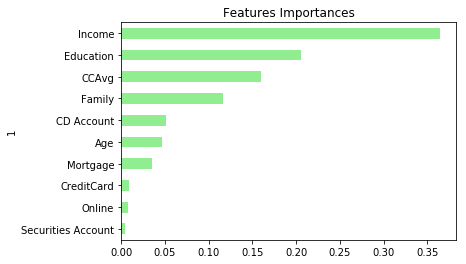

In [8]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)
predictions = rf_model.predict(X_test_scaled)
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_,features), reverse=True)

# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)